In [5]:
###ENCODE TOGETHER

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Define the CVAE architecture
class CVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, conditional_dim):
        super(CVAE, self).__init__()

        # Encoder layers
        self.encoder = nn.Sequential(
            nn.Linear(input_dim + conditional_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim * 2)  # Two outputs for mean and log variance
        )

        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim + conditional_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
        )

    def encode(self, x):
        mu_logvar = self.encoder(x)
        mu = mu_logvar[:, :latent_dim]
        logvar = mu_logvar[:, latent_dim:]
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, c):
        z_c = torch.cat([z, c], dim=1)
        return self.decoder(z_c)

    def forward(self, x, c):
        c = c.unsqueeze(0).repeat(x.size(0), 1)  # Repeat c for each sample
        x_c = torch.cat([x, c], dim=1)
        
        mu, logvar = self.encode(x_c)
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z, c)
        return x_recon, mu, logvar

# Instantiate the CVAE
input_dim = 32
latent_dim = 16
conditional_dim = 5
cvae = CVAE(input_dim, latent_dim, conditional_dim)

# Define loss function and optimizer
criterion = nn.BCELoss(reduction='sum')  # Binary cross-entropy loss
optimizer = optim.Adam(cvae.parameters(), lr=0.001)

# Generate example data
num_samples = 1000
input_data = torch.rand(num_samples, input_dim)
conditional_data = torch.rand(num_samples, conditional_dim)

# # Training loop
# num_epochs = 50
# for epoch in range(num_epochs):
#     optimizer.zero_grad()

#     # Forward pass
#     x_recon, mu, logvar = cvae(input_data, conditional_data)

#     # Calculate reconstruction loss and KL divergence
#     recon_loss = criterion(x_recon, input_data)
#     kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

#     # Total loss
#     loss = recon_loss + kl_divergence

#     # Backpropagation and optimization
#     loss.backward()
#     optimizer.step()

# ... (further code for anomaly detection based on reconstruction loss)


In [6]:
#ASSUMING ONE CONTRIBUTES TO MEAN AND ONE TO VARIANCE

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

# Define the CVAE architecture
class CVAE(nn.Module):
    def __init__(self, input_dim, latent_dim, conditional_dim):
        super(CVAE, self).__init__()

        # Encoder layers for main input
        self.encoder = nn.Sequential(
           nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
        )
        
        # Encoder layers for conditional input
        self.conditional_encoder = nn.Sequential(
            nn.Linear(conditional_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # Decoder layers
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim)
        )

    def encode(self, x, c):
        x = self.encoder(x)
        c = self.conditional_encoder(c)
        
        return x, c

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z, c):
        z_c = torch.cat([z, c], dim=1)
        return self.decoder(z_c)

    def forward(self, x, c):
        x, c = self.encode(x, c)
        
        mu, logvar = x, c  # For simplicity, assume output of encoders as mean and logvar
        z = self.reparameterize(mu, logvar)
        x_recon = self.decode(z, c)
        return x_recon, mu, logvar

# Instantiate the CVAE
input_dim = 32
latent_dim = 256
lr = 1e-4
batch_size = 32
epochs = 25

# Create the VAE model
vae = VAE(input_dim, latent_dim)

# Define loss function
def loss_function(reconstructed_x, x, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + KLD

# Create optimizer
optimizer = optim.Adam(vae.parameters(), lr=lr)

# # Training loop
# num_epochs = 50
# for epoch in range(num_epochs):
#     optimizer.zero_grad()

#     # Forward pass
#     x_recon, mu, logvar = cvae(input_data, conditional_data)

#     # Calculate reconstruction loss and KL divergence
#     recon_loss = criterion(x_recon, input_data)
#     kl_divergence = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())

#     # Total loss
#     loss = recon_loss + kl_divergence

#     # Backpropagation and optimization
#     loss.backward()
#     optimizer.step()

# ... (further code for anomaly detection based on reconstruction loss)


In [ ]:
##BASIC VAE
import torch
import torch.nn as nn
import torch.optim as optim

class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
        )
        
        self.conditional_encoder = nn.Sequential(
            nn.Linear(conditional_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()

        self.fc_mu = nn.Linear(64, latent_dim)
        self.fc_logvar = nn.Linear(64, latent_dim)

    def forward(self, x):
        x = self.encoder(x)
        c = self_conditional_encoder(c)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim, input_dim):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim),
        )

    def forward(self, x):
        x = self.decoder(x)
        return x

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

# Hyperparameters
input_dim = 32
latent_dim = 256
lr = 1e-4
batch_size = 32
epochs = 25

# Create the VAE model
vae = VAE(input_dim, latent_dim)

# Define loss function
def loss_function(reconstructed_x, x, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + KLD

# Create optimizer
optimizer = optim.Adam(vae.parameters(), lr=lr)

# Training loop
for epoch in range(epochs):
    total_loss = 0
    for i in tqdm(range(0, len(source_poses), 32), leave = True, position = 0): 
        data_point =  source_poses[i:i + 32]
        data_point = np.array(data_point).reshape(-1,32)
#         print(data_point.shape)
        data_point = torch.tensor(data_point, dtype=torch.float32)
        
        optimizer.zero_grad()
        reconstructed_data, mean, logvar = vae(data_point)
        loss = loss_function(reconstructed_data, data_point, mean, logvar)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss / 451000}')

# Generate samples from the trained VAE
# with torch.no_grad():
#     z = torch.randn(16, latent_dim)
#     generated_samples = vae.decoder(z)

# You can convert generated_samples to a format suitable for your application


In [2]:
import random
import time
import warnings
import sys
import argparse
import shutil
import cv2 
import math
import os
# os.environ["CUDA_VISIBLE_DEVICES"] = "2"

import random

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

import torch
import torch.backends.cudnn as cudnn
from torch.optim import SGD
from torch.optim.lr_scheduler import LambdaLR, MultiStepLR
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, ToPILImage

sys.path.append('../..')
from tllib.alignment.regda import PoseResNet2d as RegDAPoseResNet, \
    PseudoLabelGenerator2d, RegressionDisparity
import tllib.vision.models as models
from tllib.vision.models.keypoint_detection.pose_resnet import Upsampling, PoseResNet
from tllib.vision.models.keypoint_detection.loss import JointsKLLoss
import tllib.vision.datasets.keypoint_detection as datasets
import tllib.vision.transforms.keypoint_detection as T
from tllib.vision.transforms import Denormalize
from tllib.utils.data import ForeverDataIterator
from tllib.utils.meter import AverageMeter, ProgressMeter, AverageMeterDict
from tllib.utils.metric.keypoint_detection import accuracy
from tllib.utils.logger import CompleteLogger
from webcolors import name_to_rgb
device = torch.device("cuda:2")

In [1]:
def get_colored_skeleton():
    """
    Dataset with 16 body keypoints.
    """
    # TODO: add image
    head = (9,)
    shoulder = (12, 13)
    elbow = (11, 14)
    wrist = (10, 15)
    hip = (2, 3)
    knee = (1, 4)
    ankle = (0, 5)
    all = (12, 13, 11, 14, 10, 15, 2, 3, 1, 4, 0, 5)
    right_leg = (0, 1, 2, 8)
    left_leg = (5, 4, 3, 8)
    backbone = (8, 9)
    right_arm = (10, 11, 12, 8)
    left_arm = (15, 14, 13, 8)


    colored_skeleton = {
        "right_leg": (right_leg, 'yellow'),
        "left_leg": (left_leg, 'green'),
        "backbone": (backbone, 'blue'),
        "right_arm": (right_arm, 'purple'),
        "left_arm": (left_arm, 'red'),
    }
    return colored_skeleton

In [3]:
 def get_colored_skeleton():
        all = tuple(range(21))
        thumb = (0, 1, 2, 3, 4)
        index_finger = (0, 5, 6, 7, 8)
        middle_finger = (0, 9, 10, 11, 12)
        ring_finger = (0, 13, 14, 15, 16)
        little_finger = (0, 17, 18, 19, 20)

        colored_skeleton = {
            "thumb": (thumb, 'yellow'),
            "index_finger": (index_finger, 'green'),
            "middle_finger": (middle_finger, 'blue'),
            "ring_finger": (ring_finger, 'purple'),
            "little_finger": (little_finger, 'red'),
        }
        
        return colored_skeleton

In [5]:
source_root = '/pfs/rdi/cei/synthetic_data/public_dataset/RHD/'
source = 'RenderedHandPose' 
target_root = '/pfs/rdi/cei/synthetic_data/public_dataset/lsp/'
target = 'Hand3DStudio'

image_size = (256,256)
heatmap_size = (64, 64)
resize_scale = (0.6, 1.3)
batch_size = 32

normalize = T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
transform = T.Compose([
    T.Resize(image_size[0]),
    T.ToTensor(),
])

# define visualization function
tensor_to_image = Compose([
    ToPILImage()
])

In [3]:
source_root = '/pfs/rdi/cei/synthetic_data/public_dataset/surreal/surreal_processed'
source = 'SURREAL'
target_root = '/pfs/rdi/cei/synthetic_data/public_dataset/lsp'
target = 'LSP'
pretrained_model_path = '/pfs/rdi/cei/algo_train/ishadua/SyntheticDataset/KePSI_logs/regda/surreal2lsp/checkpoints/best.pth'
image_size = (256,256)
heatmap_size = (64, 64)
resize_scale = (0.6, 1.3)
batch_size = 32
joint_names = ['hips','leftUpLeg','rightUpLeg', 'spine','leftLeg', 'rightLeg','spine1', 'leftFoot','rightFoot','spine2','leftToeBase',
            'rightToeBase','neck','leftShoulder','rightShoulder', 'head','leftArm', 'rightArm', 'leftForeArm', 'rightForeArm', 'leftHand', 
            'rightHand','leftHandIndex1', 'rightHandIndex1']

joint_names = np.array(joint_names)
joint_index =  (7, 4, 1, 2, 5, 8, 0, 9, 12, 15, 20, 18, 13, 14, 19, 21)
joint_names = list(joint_names[[joint_index]])
print(joint_names)

['leftFoot', 'leftLeg', 'leftUpLeg', 'rightUpLeg', 'rightLeg', 'rightFoot', 'hips', 'spine2', 'neck', 'head', 'leftHand', 'leftForeArm', 'leftShoulder', 'rightShoulder', 'rightForeArm', 'rightHand']


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


In [4]:
kinematic_tree = [('head','neck','rightShoulder'),
                  ('head','neck','leftShoulder'),
                  ('neck','rightShoulder', 'rightForeArm'),
                  ('neck','leftShoulder', 'leftForeArm'),
                  ('rightShoulder', 'rightForeArm','rightHand'),
                  ('leftShoulder', 'leftForeArm','leftHand'),
                  ('head','neck','leftUpLeg'),
                  ('head','neck','rightUpLeg'),
                  ('neck','leftUpLeg', 'leftLeg'),
                  ('neck','rightUpLeg', 'rightLeg'),           
                  ('leftUpLeg', 'leftLeg', 'leftFoot'),
                  ('rightUpLeg', 'rightLeg', 'rightFoot'),

                  ('rightShoulder', 'neck', 'leftShoulder'), # new
                  ('rightShoulder', 'neck', 'leftForeArm'),
                  ('rightShoulder', 'neck', 'leftHand'),
                  ('rightShoulder', 'neck', 'leftUpLeg'),
                  ('rightShoulder', 'neck', 'leftLeg'),
                  ('rightShoulder', 'neck', 'leftFoot'),
                  ('rightShoulder', 'neck', 'rightUpLeg'),
                  ('rightShoulder', 'neck', 'rightLeg'),
                  ('rightShoulder', 'neck', 'rightFoot'),


                  ('rightForeArm', 'neck', 'leftShoulder'), # new
                  ('rightForeArm', 'neck', 'leftForeArm'),
                  ('rightForeArm', 'neck', 'leftHand'),
                  ('rightForeArm', 'neck', 'leftUpLeg'),
                  ('rightForeArm', 'neck', 'leftLeg'),
                  ('rightForeArm', 'neck', 'leftFoot'),
                  ('rightForeArm', 'neck', 'rightUpLeg'),
                  ('rightForeArm', 'neck', 'rightLeg'),
                  ('rightForeArm', 'neck', 'rightFoot'),

                  ('rightHand', 'neck', 'leftShoulder'), # new
                  ('rightHand', 'neck', 'leftForeArm'),
                  ('rightHand', 'neck', 'leftHand'),
                  ('rightHand', 'neck', 'leftUpLeg'),
                  ('rightHand', 'neck', 'leftLeg'),
                  ('rightHand', 'neck', 'leftFoot'),
                  ('rightHand', 'neck', 'rightUpLeg'),
                  ('rightHand', 'neck', 'rightLeg'),
                  ('rightHand', 'neck', 'rightFoot'),

                  ('rightUpLeg', 'neck', 'leftShoulder'), # new
                  ('rightUpLeg', 'neck', 'leftForeArm'),
                  ('rightUpLeg', 'neck', 'leftHand'),
                  ('rightUpLeg', 'neck', 'leftUpLeg'),
                  ('rightUpLeg', 'neck', 'leftLeg'),
                  ('rightUpLeg', 'neck', 'leftFoot'),

                  ('rightLeg', 'neck', 'leftShoulder'), # new
                  ('rightLeg', 'neck', 'leftForeArm'),
                  ('rightLeg', 'neck', 'leftHand'),
                  ('rightLeg', 'neck', 'leftUpLeg'),
                  ('rightLeg', 'neck', 'leftLeg'),
                  ('rightLeg', 'neck', 'leftFoot'),

                  ('rightFoot', 'neck', 'leftShoulder'), # new
                  ('rightFoot', 'neck', 'leftForeArm'),
                  ('rightFoot', 'neck', 'leftHand'),
                  ('rightFoot', 'neck', 'leftUpLeg'),
                  ('rightFoot', 'neck', 'leftLeg'),
                  ('rightFoot', 'neck', 'leftFoot'),

                  ('leftUpLeg', 'neck', 'leftShoulder'), # new
                  ('leftUpLeg', 'neck', 'leftForeArm'),
                  ('leftUpLeg', 'neck', 'leftHand'),

                  ('leftLeg', 'neck', 'leftShoulder'), # new
                  ('leftLeg', 'neck', 'leftForeArm'),
                  ('leftLeg', 'neck', 'leftHand'),

                  ('leftFoot', 'neck', 'leftShoulder'), # new
                  ('leftFoot', 'neck', 'leftForeArm'),
                  ('leftFoot', 'neck', 'leftHand'),

 

                 ]

In [20]:
kinematic_tree = [('head','neck','rightShoulder'),
                  ('head','neck','leftShoulder'),
                  ('neck','rightShoulder', 'rightForeArm'),
                  ('neck','leftShoulder', 'leftForeArm'),
                  ('rightShoulder', 'rightForeArm','rightHand'),
                  ('leftShoulder', 'leftForeArm','leftHand'),
                  ('head','neck','leftUpLeg'),
                  ('head','neck','rightUpLeg'),
                  ('neck','leftUpLeg', 'leftLeg'),
                  ('neck','rightUpLeg', 'rightLeg'),
                  ('leftUpLeg', 'leftLeg', 'leftFoot'),
                  ('rightUpLeg', 'rightLeg', 'rightFoot'),
                 ]


In [6]:
joint_names = ['handcenter',
                'thumb1',
                'thumb2',
                'thumb3',
                'thumb4',
                'index_finger1',
                'index_finger2',
                'index_finger3',
                'index_finger4',
                'middle_finger1',
                'middle_finger2',
                'middle_finger3',
                'middle_finger4',
                'ring_finger1',
                'ring_finger2',
                'ring_finger3',
                'ring_finger4',
                'little_finger1',
                'little_finger2',
                'little_finger3',
                'little_finger4',
                ]

kinematic_tree = [('handcenter','thumb1','thumb2'),
                  ('thumb1','thumb2','thumb3'),
                  ('thumb2','thumb3','thumb4'),
                  
                  ('handcenter','index_finger1','index_finger2'),
                  ('index_finger1','index_finger2','index_finger3'),
                  ('index_finger2','index_finger3','index_finger4'),
                  
                  ('handcenter','middle_finger1','middle_finger2'),
                  ('middle_finger1','middle_finger2','middle_finger3'),
                  ('middle_finger2','middle_finger3','middle_finger4'),
                  
                  ('handcenter','ring_finger1','ring_finger2'),
                  ('ring_finger1','ring_finger2','ring_finger3'),
                  ('ring_finger2','ring_finger3','ring_finger4'),
                  
                  ('handcenter','little_finger1','little_finger2'),
                  ('little_finger1','little_finger2','little_finger3'),
                  ('little_finger2','little_finger3','little_finger4'),
                  
                  ('thumb1', 'handcenter', 'index_finger1'),
                  ('thumb1', 'handcenter', 'index_finger2'),
                  ('thumb1', 'handcenter', 'index_finger3'),
                  ('thumb1', 'handcenter', 'index_finger4'),
                  
                  ('thumb1', 'handcenter', 'middle_finger1'),
                  ('thumb1', 'handcenter', 'middle_finger2'),
                  ('thumb1', 'handcenter', 'middle_finger3'),
                  ('thumb1', 'handcenter', 'middle_finger4'),
                  
                  ('thumb1', 'handcenter', 'ring_finger1'),
                  ('thumb1', 'handcenter', 'ring_finger2'),
                  ('thumb1', 'handcenter', 'ring_finger3'),
                  ('thumb1', 'handcenter', 'ring_finger4'),
                  
                  ('thumb1', 'handcenter', 'little_finger1'),
                  ('thumb1', 'handcenter', 'little_finger2'),
                  ('thumb1', 'handcenter', 'little_finger3'),
                  ('thumb1', 'handcenter', 'little_finger4'),
                  
                  ('thumb2', 'handcenter', 'index_finger1'),
                  ('thumb2', 'handcenter', 'index_finger2'),
                  ('thumb2', 'handcenter', 'index_finger3'),
                  ('thumb2', 'handcenter', 'index_finger4'),
                  
                  ('thumb2', 'handcenter', 'middle_finger1'),
                  ('thumb2', 'handcenter', 'middle_finger2'),
                  ('thumb2', 'handcenter', 'middle_finger3'),
                  ('thumb2', 'handcenter', 'middle_finger4'),
                  
                  ('thumb2', 'handcenter', 'ring_finger1'),
                  ('thumb2', 'handcenter', 'ring_finger2'),
                  ('thumb2', 'handcenter', 'ring_finger3'),
                  ('thumb2', 'handcenter', 'ring_finger4'),
                  
                  ('thumb2', 'handcenter', 'little_finger1'),
                  ('thumb2', 'handcenter', 'little_finger2'),
                  ('thumb2', 'handcenter', 'little_finger3'),
                  ('thumb2', 'handcenter', 'little_finger4'),
                  
                  ('thumb3', 'handcenter', 'index_finger1'),
                  ('thumb3', 'handcenter', 'index_finger2'),
                  ('thumb3', 'handcenter', 'index_finger3'),
                  ('thumb3', 'handcenter', 'index_finger4'),
                  
                  ('thumb3', 'handcenter', 'middle_finger1'),
                  ('thumb3', 'handcenter', 'middle_finger2'),
                  ('thumb3', 'handcenter', 'middle_finger3'),
                  ('thumb3', 'handcenter', 'middle_finger4'),
                  
                  ('thumb3', 'handcenter', 'ring_finger1'),
                  ('thumb3', 'handcenter', 'ring_finger2'),
                  ('thumb3', 'handcenter', 'ring_finger3'),
                  ('thumb3', 'handcenter', 'ring_finger4'),
                  
                  ('thumb3', 'handcenter', 'little_finger1'),
                  ('thumb3', 'handcenter', 'little_finger2'),
                  ('thumb3', 'handcenter', 'little_finger3'),
                  ('thumb3', 'handcenter', 'little_finger4'),
                  
                  ('thumb4', 'handcenter', 'index_finger1'),
                  ('thumb4', 'handcenter', 'index_finger2'),
                  ('thumb4', 'handcenter', 'index_finger3'),
                  ('thumb4', 'handcenter', 'index_finger4'),
                  
                  ('thumb4', 'handcenter', 'middle_finger1'),
                  ('thumb4', 'handcenter', 'middle_finger2'),
                  ('thumb4', 'handcenter', 'middle_finger3'),
                  ('thumb4', 'handcenter', 'middle_finger4'),
                  
                  ('thumb4', 'handcenter', 'ring_finger1'),
                  ('thumb4', 'handcenter', 'ring_finger2'),
                  ('thumb4', 'handcenter', 'ring_finger3'),
                  ('thumb4', 'handcenter', 'ring_finger4'),
                  
                  ('thumb4', 'handcenter', 'little_finger1'),
                  ('thumb4', 'handcenter', 'little_finger2'),
                  ('thumb4', 'handcenter', 'little_finger3'),
                  ('thumb4', 'handcenter', 'little_finger4'),
                  
                  ('index_finger1', 'handcenter', 'middle_finger1'),
                  ('index_finger1', 'handcenter', 'middle_finger2'),
                  ('index_finger1', 'handcenter', 'middle_finger3'),
                  ('index_finger1', 'handcenter', 'middle_finger4'),
                  
                  ('index_finger1', 'handcenter', 'ring_finger1'),
                  ('index_finger1', 'handcenter', 'ring_finger2'),
                  ('index_finger1', 'handcenter', 'ring_finger3'),
                  ('index_finger1', 'handcenter', 'ring_finger4'),
                  
                  ('index_finger1', 'handcenter', 'little_finger1'),
                  ('index_finger1', 'handcenter', 'little_finger2'),
                  ('index_finger1', 'handcenter', 'little_finger3'),
                  ('index_finger1', 'handcenter', 'little_finger4'),
                  
                  ('index_finger2', 'handcenter', 'middle_finger1'),
                  ('index_finger2', 'handcenter', 'middle_finger2'),
                  ('index_finger2', 'handcenter', 'middle_finger3'),
                  ('index_finger2', 'handcenter', 'middle_finger4'),
                  
                  ('index_finger2', 'handcenter', 'ring_finger1'),
                  ('index_finger2', 'handcenter', 'ring_finger2'),
                  ('index_finger2', 'handcenter', 'ring_finger3'),
                  ('index_finger2', 'handcenter', 'ring_finger4'),
                  
                  ('index_finger2', 'handcenter', 'little_finger1'),
                  ('index_finger2', 'handcenter', 'little_finger2'),
                  ('index_finger2', 'handcenter', 'little_finger3'),
                  ('index_finger2', 'handcenter', 'little_finger4'),
                                    
                  ('index_finger3', 'handcenter', 'middle_finger1'),
                  ('index_finger3', 'handcenter', 'middle_finger2'),
                  ('index_finger3', 'handcenter', 'middle_finger3'),
                  ('index_finger3', 'handcenter', 'middle_finger4'),
                  
                  ('index_finger3', 'handcenter', 'ring_finger1'),
                  ('index_finger3', 'handcenter', 'ring_finger2'),
                  ('index_finger3', 'handcenter', 'ring_finger3'),
                  ('index_finger3', 'handcenter', 'ring_finger4'),
                  
                  ('index_finger3', 'handcenter', 'little_finger1'),
                  ('index_finger3', 'handcenter', 'little_finger2'),
                  ('index_finger3', 'handcenter', 'little_finger3'),
                  ('index_finger3', 'handcenter', 'little_finger4'),
                  
                  ('index_finger4', 'handcenter', 'middle_finger1'),
                  ('index_finger4', 'handcenter', 'middle_finger2'),
                  ('index_finger4', 'handcenter', 'middle_finger3'),
                  ('index_finger4', 'handcenter', 'middle_finger4'),
                  
                  ('index_finger4', 'handcenter', 'ring_finger1'),
                  ('index_finger4', 'handcenter', 'ring_finger2'),
                  ('index_finger4', 'handcenter', 'ring_finger3'),
                  ('index_finger4', 'handcenter', 'ring_finger4'),
                  
                  ('index_finger4', 'handcenter', 'little_finger1'),
                  ('index_finger4', 'handcenter', 'little_finger2'),
                  ('index_finger4', 'handcenter', 'little_finger3'),
                  ('index_finger4', 'handcenter', 'little_finger4'),
                  
                  ('middle_finger1', 'handcenter', 'ring_finger1'),
                  ('middle_finger1', 'handcenter', 'ring_finger2'),
                  ('middle_finger1', 'handcenter', 'ring_finger3'),
                  ('middle_finger1', 'handcenter', 'ring_finger4'),
                  
                  ('middle_finger1', 'handcenter', 'little_finger1'),
                  ('middle_finger1', 'handcenter', 'little_finger2'),
                  ('middle_finger1', 'handcenter', 'little_finger3'),
                  ('middle_finger1', 'handcenter', 'little_finger4'),
                  
                  ('middle_finger2', 'handcenter', 'ring_finger1'),
                  ('middle_finger2', 'handcenter', 'ring_finger2'),
                  ('middle_finger2', 'handcenter', 'ring_finger3'),
                  ('middle_finger2', 'handcenter', 'ring_finger4'),
                  
                  ('middle_finger2', 'handcenter', 'little_finger1'),
                  ('middle_finger2', 'handcenter', 'little_finger2'),
                  ('middle_finger2', 'handcenter', 'little_finger3'),
                  ('middle_finger2', 'handcenter', 'little_finger4'),
                  
                  ('middle_finger3', 'handcenter', 'ring_finger1'),
                  ('middle_finger3', 'handcenter', 'ring_finger2'),
                  ('middle_finger3', 'handcenter', 'ring_finger3'),
                  ('middle_finger3', 'handcenter', 'ring_finger4'),
                  
                  ('middle_finger3', 'handcenter', 'little_finger1'),
                  ('middle_finger3', 'handcenter', 'little_finger2'),
                  ('middle_finger3', 'handcenter', 'little_finger3'),
                  ('middle_finger3', 'handcenter', 'little_finger4'),
                  
                  ('middle_finger4', 'handcenter', 'ring_finger1'),
                  ('middle_finger4', 'handcenter', 'ring_finger2'),
                  ('middle_finger4', 'handcenter', 'ring_finger3'),
                  ('middle_finger4', 'handcenter', 'ring_finger4'),
                  
                  ('middle_finger4', 'handcenter', 'little_finger1'),
                  ('middle_finger4', 'handcenter', 'little_finger2'),
                  ('middle_finger4', 'handcenter', 'little_finger3'),
                  ('middle_finger4', 'handcenter', 'little_finger4'),
                  
                  ('ring_finger1', 'handcenter', 'little_finger1'),
                  ('ring_finger1', 'handcenter', 'little_finger2'),
                  ('ring_finger1', 'handcenter', 'little_finger3'),
                  ('ring_finger1', 'handcenter', 'little_finger4'),
                  
                  ('ring_finger2', 'handcenter', 'little_finger1'),
                  ('ring_finger2', 'handcenter', 'little_finger2'),
                  ('ring_finger2', 'handcenter', 'little_finger3'),
                  ('ring_finger2', 'handcenter', 'little_finger4'),
                  
                  ('ring_finger3', 'handcenter', 'little_finger1'),
                  ('ring_finger3', 'handcenter', 'little_finger2'),
                  ('ring_finger3', 'handcenter', 'little_finger3'),
                  ('ring_finger3', 'handcenter', 'little_finger4'),
                  
                  ('ring_finger4', 'handcenter', 'little_finger1'),
                  ('ring_finger4', 'handcenter', 'little_finger2'),
                  ('ring_finger4', 'handcenter', 'little_finger3'),
                  ('ring_finger4', 'handcenter', 'little_finger4'),
                 ]

In [5]:
def visualize(image, keypoints, filename):
    colored_skeleton = get_colored_skeleton()
    image = cv2.cvtColor(np.asarray(image), cv2.COLOR_RGB2BGR).copy()
    for (_, (line, color)) in colored_skeleton.items():
        for i in range(len(line) - 1):
            start, end = keypoints[line[i]], keypoints[line[i + 1]]
            cv2.line(image, (int(start[0]), int(start[1])), (int(end[0]), int(end[1])), color=name_to_rgb(color),
                     thickness=3)
    for keypoint in keypoints:
        cv2.circle(image, (int(keypoint[0]), int(keypoint[1])), 3, name_to_rgb('black'), 1)
    return image

In [6]:
normalize = T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
train_transform = T.Compose([
    T.RandomRotation(60),
    T.RandomResizedCrop(size=image_size, scale=resize_scale),
    T.ColorJitter(brightness=0.25, contrast=0.25, saturation=0.25),
    T.GaussianBlur(),
    T.ToTensor(),
    normalize
])
val_transform = T.Compose([
    T.Resize(image_size[0]),
    T.ToTensor(),
    normalize
])

# define visualization function
tensor_to_image = Compose([
    Denormalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ToPILImage()
])

In [8]:
source_dataset = datasets.__dict__[source]
val_source_dataset = source_dataset(root=source_root, split='test', transforms=val_transform,
                                    image_size=image_size, heatmap_size=heatmap_size)
val_source_loader = DataLoader(val_source_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
print("Source test:", len(val_source_loader))

# target_dataset = datasets.__dict__[target]
# val_target_dataset = target_dataset(root=target_root, split='test', transforms=val_transform,
#                                     image_size=image_size, heatmap_size=heatmap_size)
# val_target_loader = DataLoader(val_target_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
# print("Target test:", len(val_target_loader))

loading /pfs/rdi/cei/synthetic_data/public_dataset/surreal/surreal_processed/test/run0.json
loading /pfs/rdi/cei/synthetic_data/public_dataset/surreal/surreal_processed/test/run1.json
loading /pfs/rdi/cei/synthetic_data/public_dataset/surreal/surreal_processed/test/run2.json
Source test: 100


In [12]:
target_angle_vector = []
target_images = []
target_indexes = []
target_poses = []
for i, (index, x, label, weight, meta) in tqdm(enumerate(val_source_loader),position = 0, leave = True):
    x = x.to(device)
    label = label.to(device)
    weight = weight.to(device)
    pose = np.array(meta['keypoint2d']).astype(int)
    dk = pose.reshape(-1,32)
    target_poses.extend(dk)
    angle_vector = get_angle_vector(pose, joint_names, kinematic_tree)
    target_angle_vector.extend(angle_vector)
    target_indexes.extend(index.numpy())    
    for j in range(len(x)):
        image = visualize(tensor_to_image(x[j]), meta['keypoint2d'][j],  'test.png')
        target_images.append(image)

11it [00:03,  3.40it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
100it [00:25,  4.43it/s]


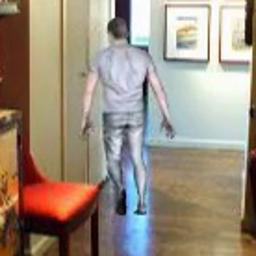

In [16]:
tensor_to_image(x[j])

In [10]:
def angle_of_vectors(joint1, joint2, joint3):
    a = joint1[0]-joint2[0]
    b = joint1[1]-joint2[1]
    c = joint3[0]-joint2[0]
    d = joint3[1]-joint2[1]
    
    dotProduct = a*c + b*d
    modOfVector = math.sqrt( a*a + b*b)*math.sqrt(c*c + d*d) 
    angle = dotProduct/modOfVector
    
    try:
        angleInDegree = math.degrees(math.acos(angle))
    except:
#         print(angle)
        angleInDegree = math.degrees(math.acos(angle.astype(int)))
    return angleInDegree

In [13]:
target_angle_vector = np.array(target_angle_vector)
target_poses = np.array(target_poses)
print(target_angle_vector.shape)

(3200, 66)


In [11]:
def get_angle_vector(poses, joint_names, kinematic_tree):
    batch_angle_vector = []
    for pose in poses:
        angle_vector = []
        for j, (joint1, joint2, joint3) in enumerate(kinematic_tree):
            joint1 = pose[joint_names.index(joint1)]
            joint2 = pose[joint_names.index(joint2)]
            joint3 = pose[joint_names.index(joint3)]
            angle = angle_of_vectors(joint1, joint2, joint3)
            if math.isnan(angle): angle=0
            angle_vector.append(np.round(angle,3))
        batch_angle_vector.append(angle_vector)
    return batch_angle_vector


from numpy.linalg import norm
def cos_dist(A,B):
    A = np.array(A)
    B = np.array(B)
    cosine = np.dot(A,B)/(norm(A)*norm(B))
    return cosine

def get_similar_angle_vector(angle_vector, source_angle_vector):
    similar_angle_vectors = []
    for j in range(len(source_angle_vector)):
#         print(cos_dist(angle_vector, source_angle_vector[j])[0])
        similar_angle_vectors.append(cos_dist(angle_vector, source_angle_vector[j])[0])
    return similar_angle_vectors 

def get_similar_angle_vector_optimized(angle_vector, source_angle_vector):
    A_norm = norm(angle_vector, axis=-1)
    B_norm = norm(source_angle_vector, axis=-1)
    A_norm = np.tile(A_norm.reshape(len(A_norm),1), len(source_angle_vector))

    A_norm_dot_B_norm = A_norm*B_norm
    A_dot_B = np.dot(angle_vector, source_angle_vector.T)
    cosine = A_dot_B/A_norm_dot_B_norm
    return cosine**10

In [19]:
#CVAE 1
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np

# Define your C-VAE architecture with deeper layers and LeakyReLU
class CVAE(nn.Module):
    def __init__(self, input_dim, conditional_dim, latent_dim):
        super(CVAE, self).__init__()
        # Encoder for data
        self.data_encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, latent_dim * 2)  # Two times latent_dim for mean and variance
        )
        
        # Encoder for conditional input
        self.condition_encoder = nn.Sequential(
            nn.Linear(conditional_dim, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, latent_dim * 2)  # Two times latent_dim for mean and variance
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.LeakyReLU(0.2),
            nn.Linear(32, 64),
            nn.LeakyReLU(0.2),
            nn.Linear(64, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, input_dim)
        )
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def forward(self, x, c):
        data_z_params = self.data_encoder(x)
        condition_z_params = self.condition_encoder(c)
        
        data_mu, data_logvar = torch.chunk(data_z_params, 2, dim=1)
        condition_mu, condition_logvar = torch.chunk(condition_z_params, 2, dim=1)
        
        # Combine the latent variables from both encoders
        combined_mu = data_mu + condition_mu
        combined_logvar = data_logvar + condition_logvar
        
        z = self.reparameterize(combined_mu, combined_logvar)
        decoded = self.decoder(z)
        return decoded, combined_mu, combined_logvar

# Define training parameters
input_dim = 42
conditional_dim = 175
latent_dim = 8
batch_size = 32
epochs = 45
learning_rate = 0.001



# Initialize the C-VAE model
model = CVAE(input_dim, conditional_dim, latent_dim)

# Define the loss function (MSE loss + KL divergence)
def loss_function(recon_x, x, mu, logvar):
    mse_loss = nn.MSELoss(reduction='sum')(recon_x, x)
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return mse_loss + kl_div

# Initialize optimizer
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(epochs):
    total_loss = 0
    for i in tqdm(range(0, len(target_poses), 32), leave = True, position = 0): 
        data_point =  target_poses[i:i + 32]
        data_point = np.array(data_point).reshape(-1,42)
        cond_point =  target_angle_vector[i:i + 32]
        cond_point = np.array(cond_point).reshape(-1,175)
#         print(data_point.shape)
        data_point = torch.tensor(data_point, dtype=torch.float32)
        cond_point = torch.tensor(cond_point, dtype=torch.float32)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data_point, cond_point)
        loss = loss_function(recon_batch, data_point, mu, logvar)
        loss.backward()
        
        optimizer.step()
        total_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss / (348*32)}')
#         
    
#     # Print training loss for each epoch
#     print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()/len(dataloader.dataset):.4f}')

# After training, you can use the model for anomaly detection
# Calculate reconstruction loss for each data point and set a threshold

# For anomaly detection on a new data point (x_test) with conditional input (c_test):
# x_test_tensor = torch.Tensor(x_test)
# c_test_tensor = torch.Tensor(c_test)
# recon_test, _, _ = model(x_test_tensor, c_test_tensor)
# reconstruction_loss = nn.MSELoss(reduction='sum')(recon_test, x_test_tensor)

# Set a threshold and classify as normal/anomaly based on the reconstruction loss

# Remember to adjust the code as needed for your specific dataset and requirements.


  3%|▎         | 12/348 [00:00<00:02, 118.73it/s]

Epoch 1/45, Loss: 3849632797.3452315


  4%|▎         | 13/348 [00:00<00:02, 128.19it/s]

Epoch 2/45, Loss: 377644.0001010237


  4%|▎         | 13/348 [00:00<00:02, 116.55it/s]

Epoch 3/45, Loss: 97866.97294809627


  4%|▍         | 14/348 [00:00<00:02, 131.40it/s]

Epoch 4/45, Loss: 81579.3774133441


  3%|▎         | 11/348 [00:00<00:03, 106.85it/s]

Epoch 5/45, Loss: 76824.08053273168


  4%|▍         | 15/348 [00:00<00:02, 144.40it/s]

Epoch 6/45, Loss: 74633.5574993265


  4%|▎         | 13/348 [00:00<00:02, 123.92it/s]

Epoch 7/45, Loss: 73560.87283921515


  3%|▎         | 9/348 [00:00<00:03, 85.03it/s]

Epoch 8/45, Loss: 72957.1479604436


  4%|▍         | 14/348 [00:00<00:02, 138.00it/s]

Epoch 9/45, Loss: 72678.67738079203


  4%|▎         | 13/348 [00:00<00:02, 121.44it/s]

Epoch 10/45, Loss: 72547.74470748025


  3%|▎         | 12/348 [00:00<00:02, 112.47it/s]

Epoch 11/45, Loss: 72388.9176712913


  4%|▍         | 15/348 [00:00<00:02, 146.19it/s]

Epoch 12/45, Loss: 72333.73001975575


  3%|▎         | 12/348 [00:00<00:02, 112.76it/s]

Epoch 13/45, Loss: 72198.77703506645


  4%|▍         | 14/348 [00:00<00:02, 138.81it/s]

Epoch 14/45, Loss: 72308.93390804598


  4%|▍         | 14/348 [00:00<00:02, 138.66it/s]

Epoch 15/45, Loss: 72190.9849923671


  4%|▎         | 13/348 [00:00<00:02, 123.15it/s]

Epoch 16/45, Loss: 72191.77224766523


  4%|▍         | 14/348 [00:00<00:02, 136.24it/s]

Epoch 17/45, Loss: 71932.60324061602


  4%|▎         | 13/348 [00:00<00:02, 129.35it/s]

Epoch 18/45, Loss: 59076.63571973779


  3%|▎         | 10/348 [00:00<00:03, 99.23it/s]

Epoch 19/45, Loss: 50121.52703226024


  3%|▎         | 12/348 [00:00<00:02, 112.92it/s]

Epoch 20/45, Loss: 48412.68560861171


  4%|▎         | 13/348 [00:00<00:02, 126.91it/s]

Epoch 21/45, Loss: 43853.17237450611


  3%|▎         | 12/348 [00:00<00:03, 111.68it/s]

Epoch 22/45, Loss: 35409.466092515264


  3%|▎         | 12/348 [00:00<00:02, 119.71it/s]

Epoch 23/45, Loss: 31867.93105833558


  3%|▎         | 12/348 [00:00<00:02, 118.66it/s]

Epoch 24/45, Loss: 31076.456461588543


  5%|▍         | 16/348 [00:00<00:02, 159.36it/s]

Epoch 25/45, Loss: 29969.376836667117


  4%|▎         | 13/348 [00:00<00:02, 124.67it/s]

Epoch 26/45, Loss: 26497.447934907057


  3%|▎         | 11/348 [00:00<00:03, 106.61it/s]

Epoch 27/45, Loss: 24865.780627020475


  4%|▍         | 14/348 [00:00<00:02, 132.28it/s]

Epoch 28/45, Loss: 23329.897668597343


  3%|▎         | 10/348 [00:00<00:03, 91.67it/s]

Epoch 29/45, Loss: 22034.886004568518


  4%|▍         | 15/348 [00:00<00:02, 143.33it/s]

Epoch 30/45, Loss: 22457.488748484644


  4%|▍         | 14/348 [00:00<00:02, 128.08it/s]

Epoch 31/45, Loss: 21384.162072894218


  4%|▍         | 14/348 [00:00<00:02, 128.58it/s]

Epoch 32/45, Loss: 21290.03899234465


  4%|▍         | 15/348 [00:00<00:02, 138.91it/s]

Epoch 33/45, Loss: 20927.51368169675


  3%|▎         | 10/348 [00:00<00:03, 95.24it/s]

Epoch 34/45, Loss: 20650.46649380388


  4%|▎         | 13/348 [00:00<00:02, 121.76it/s]

Epoch 35/45, Loss: 19381.615680563038


  4%|▎         | 13/348 [00:00<00:02, 125.01it/s]

Epoch 36/45, Loss: 18412.423631690013


  3%|▎         | 12/348 [00:00<00:02, 113.64it/s]

Epoch 37/45, Loss: 17704.828496823367


  3%|▎         | 12/348 [00:00<00:02, 114.70it/s]

Epoch 38/45, Loss: 16988.912672722476


  4%|▍         | 14/348 [00:00<00:02, 134.75it/s]

Epoch 39/45, Loss: 16169.010272848194


  3%|▎         | 9/348 [00:00<00:03, 89.66it/s]

Epoch 40/45, Loss: 16297.816042845277


  5%|▍         | 16/348 [00:00<00:02, 145.89it/s]

Epoch 41/45, Loss: 15096.0367305361


  4%|▎         | 13/348 [00:00<00:02, 124.09it/s]

Epoch 42/45, Loss: 15502.403199645294


  4%|▎         | 13/348 [00:00<00:02, 118.91it/s]

Epoch 43/45, Loss: 15488.863663596669


  5%|▍         | 16/348 [00:00<00:02, 157.61it/s]

Epoch 44/45, Loss: 16069.593757015535


100%|██████████| 348/348 [00:03<00:00, 115.42it/s]

Epoch 45/45, Loss: 16027.550850002244


In [22]:
anomalous_vae = []
errors = []
for i, (index, x, label, weight, meta) in tqdm(enumerate(val_target_loader), position=0, leave=True):
    data_points = np.array(meta['keypoint2d']).astype(int).reshape(-1, 42)
    data_points = torch.tensor(data_points, dtype=torch.float32)
    pose = np.array(meta['keypoint2d']).astype(int)
#     dk = pose.reshape(-1,32)
#     target_poses.extend(dk)
    angle_vector = get_angle_vector(pose, joint_names, kinematic_tree)
    cond_point =  angle_vector
    cond_point = np.array(cond_point).reshape(-1,175)
#         print(data_point.shape)
    data_points = torch.tensor(data_points, dtype=torch.float32)
    cond_point = torch.tensor(cond_point, dtype=torch.float32)
    optimizer.zero_grad()
    recon_batch, mu, logvar = model(data_points, cond_point)
#     print(recon_batch.shape)
#     print(data_points.shape,recon_batch.shape)
    for dj in range(len(data_points)):
        reconstruction_error = torch.norm(data_points[dj] - recon_batch[dj]).item()
#         print(reconstruction_error)
        errors.append(reconstruction_error)
        anomalous_vae.append(index[dj])

x = np.array(errors)
y = np.array(anomalous_vae)

np.save('indexes_cvae1__H3d_train_poses_REAL_SEP_ENCODING.npy',y)
np.save('recons_errors_cvae1_H3D_train_REAL_SEP_ENCODING.npy',x)
torch.save(model, './cvae1_model_H3D_train')


0it [00:00, ?it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  del sys.path[0]
25it [00:12,  2.11it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
348it [02:42,  2.88it/s]


In [16]:
target_poses.shape

(2000, 32)

In [34]:
target_angle_vector = np.array(target_angle_vector)
target_angle_vector.shape

(2000, 66)

In [16]:
data_point.shape

torch.Size([32, 32])

In [24]:
#CVAE4 normlized
#CVAE5 unnormalized
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim+conditional_dim, 512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )

        self.fc_mu = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim, input_dim):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim+conditional_dim),
        )

    def forward(self, x):
        x = self.decoder(x)
        return x

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

# Hyperparameters
input_dim = 42
latent_dim = 16
conditional_dim = 175
lr = 1e-4
batch_size = 32
epochs = 45

# Create the VAE model
vae = VAE(input_dim, latent_dim)

# Define loss function
def loss_function(reconstructed_x, x, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + KLD

optimizer = optim.Adam(vae.parameters(), lr=lr)

for epoch in range(epochs):
    total_loss = 0
    for i in tqdm(range(0, len(target_poses), 32), leave = True, position = 0): 
        data_point =  target_poses[i:i + 32]
        data_point = np.array(data_point).reshape(-1,42)
        cond_point =  target_angle_vector[i:i + 32]
        cond_point = np.array(cond_point).reshape(-1,175)
#         print(data_point.shape)
        norm1 = data_point / np.linalg.norm(data_point)
        norm2= cond_point /  np.linalg.norm(cond_point)
        x = np.concatenate((norm1,norm2), axis = 1)
#         data_point = torch.tensor(data_point, dtype=torch.float32)
#         cond_point = torch.tensor(cond_point, dtype=torch.float32)
        x = torch.tensor(x, dtype=torch.float32)
        
#         x = torch.cat((data_point,cond_point),axis = 1)
#         print(x.shape)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(x)
        loss = loss_function(recon_batch, x, mu, logvar)
        loss.backward()
        
        optimizer.step()
        total_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss  / (32*348)}')

  1%|          | 2/348 [00:00<00:22, 15.70it/s]

Epoch 1/45, Loss: 0.025418210951290255


  1%|          | 3/348 [00:00<00:13, 25.29it/s]

Epoch 2/45, Loss: 0.00882271812136831


  1%|          | 2/348 [00:00<00:20, 17.04it/s]

Epoch 3/45, Loss: 0.00848007127348248


  1%|          | 3/348 [00:00<00:16, 20.61it/s]

Epoch 4/45, Loss: 0.008363592235007506


  1%|          | 3/348 [00:00<00:16, 20.99it/s]

Epoch 5/45, Loss: 0.008310723772818416


  1%|          | 3/348 [00:00<00:13, 26.29it/s]

Epoch 6/45, Loss: 0.00828368673582786


  1%|          | 2/348 [00:00<00:20, 16.63it/s]

Epoch 7/45, Loss: 0.008247237774307957


  1%|          | 2/348 [00:00<00:21, 15.93it/s]

Epoch 8/45, Loss: 0.008242105164607966


  1%|          | 3/348 [00:00<00:17, 19.76it/s]

Epoch 9/45, Loss: 0.008226558788219231


  1%|          | 3/348 [00:00<00:16, 20.54it/s]

Epoch 10/45, Loss: 0.008214361680639458


  1%|          | 2/348 [00:00<00:20, 16.86it/s]

Epoch 11/45, Loss: 0.008209319530996954


  1%|          | 2/348 [00:00<00:28, 12.18it/s]

Epoch 12/45, Loss: 0.008200524382871287


  1%|          | 3/348 [00:00<00:16, 21.11it/s]

Epoch 13/45, Loss: 0.008195808802292436


  1%|          | 3/348 [00:00<00:15, 22.06it/s]

Epoch 14/45, Loss: 0.008186628188317021


  0%|          | 1/348 [00:00<00:42,  8.25it/s]

Epoch 15/45, Loss: 0.00818835794604544


  1%|          | 3/348 [00:00<00:13, 26.01it/s]

Epoch 16/45, Loss: 0.0081765816102725


  1%|          | 2/348 [00:00<00:18, 18.59it/s]

Epoch 17/45, Loss: 0.008175271564570052


  1%|          | 2/348 [00:00<00:17, 19.49it/s]

Epoch 18/45, Loss: 0.00817194799277075


  1%|          | 2/348 [00:00<00:21, 16.27it/s]

Epoch 19/45, Loss: 0.008169260878255055


  1%|          | 3/348 [00:00<00:16, 20.73it/s]

Epoch 20/45, Loss: 0.008166223737657413


  1%|          | 2/348 [00:00<00:22, 15.38it/s]

Epoch 21/45, Loss: 0.008163392618726725


  1%|          | 3/348 [00:00<00:19, 18.11it/s]

Epoch 22/45, Loss: 0.00816019257830306


  1%|          | 2/348 [00:00<00:19, 17.37it/s]

Epoch 23/45, Loss: 0.008157669273526248


  1%|          | 2/348 [00:00<00:22, 15.71it/s]

Epoch 24/45, Loss: 0.008155627937548548


  1%|          | 2/348 [00:00<00:17, 19.71it/s]

Epoch 25/45, Loss: 0.00815264193940608


  1%|          | 2/348 [00:00<00:20, 16.94it/s]

Epoch 26/45, Loss: 0.008151658003796535


  1%|          | 3/348 [00:00<00:15, 21.95it/s]

Epoch 27/45, Loss: 0.00814884438998355


  1%|          | 2/348 [00:00<00:17, 19.98it/s]

Epoch 28/45, Loss: 0.008147561760758445


  1%|          | 3/348 [00:00<00:14, 23.98it/s]

Epoch 29/45, Loss: 0.008146314936604393


  1%|          | 3/348 [00:00<00:16, 20.68it/s]

Epoch 30/45, Loss: 0.008145288136070487


  1%|          | 2/348 [00:00<00:18, 18.23it/s]

Epoch 31/45, Loss: 0.008142919401402703


  1%|          | 3/348 [00:00<00:17, 20.29it/s]

Epoch 32/45, Loss: 0.008142104253290627


  1%|          | 2/348 [00:00<00:19, 17.56it/s]

Epoch 33/45, Loss: 0.008141956297445229


  1%|          | 3/348 [00:00<00:14, 24.05it/s]

Epoch 34/45, Loss: 0.00814003086830864


  1%|          | 2/348 [00:00<00:17, 19.24it/s]

Epoch 35/45, Loss: 0.008139208802182612


  1%|          | 2/348 [00:00<00:23, 15.04it/s]

Epoch 36/45, Loss: 0.008138689739715266


  1%|          | 3/348 [00:00<00:13, 25.37it/s]

Epoch 37/45, Loss: 0.008137416007564586


  1%|          | 2/348 [00:00<00:19, 17.60it/s]

Epoch 38/45, Loss: 0.008135412311202836


  1%|          | 2/348 [00:00<00:17, 19.55it/s]

Epoch 39/45, Loss: 0.008135499028574633


  1%|          | 3/348 [00:00<00:13, 25.37it/s]

Epoch 40/45, Loss: 0.008134457492804819


  1%|          | 2/348 [00:00<00:18, 18.27it/s]

Epoch 41/45, Loss: 0.00813301131343362


  1%|          | 3/348 [00:00<00:19, 17.86it/s]

Epoch 42/45, Loss: 0.008133086561889056


  1%|          | 2/348 [00:00<00:18, 18.30it/s]

Epoch 43/45, Loss: 0.008131841680666581


  1%|          | 3/348 [00:00<00:15, 22.07it/s]

Epoch 44/45, Loss: 0.008130874309485414


100%|██████████| 348/348 [00:18<00:00, 15.60it/s]

Epoch 45/45, Loss: 0.008130883211912266


In [28]:
anomalous_vae = []
errors = []
for i, (index, x, label, weight, meta) in tqdm(enumerate(val_target_loader), position=0, leave=True):
    data_points = np.array(meta['keypoint2d']).astype(int).reshape(-1, 42)

    pose = np.array(meta['keypoint2d']).astype(int)

    angle_vector = get_angle_vector(pose, joint_names, kinematic_tree)
    cond_point = np.array(angle_vector).reshape(-1,175)
    norm1 = data_points /  np.linalg.norm(data_point)
    norm2= cond_point / np.linalg.norm(cond_point)
    x = np.concatenate((norm1,norm2), axis = 1)
    data_pointx = torch.tensor(x, dtype=torch.float32)
    recon_batch, mu, logvar = vae(data_pointx)
#     print(recon_batch.shape)
#     print(data_pointx.shape,recon_batch.shape)
    for dj in range(len(data_pointx)):
        reconstruction_error = torch.norm(data_pointx[dj] - recon_batch[dj]).item()
#         print(reconstruction_error)
        errors.append(reconstruction_error)
        anomalous_vae.append(index[dj])

x = np.array(errors)
y = np.array(anomalous_vae)

np.save('indexes_cvae4_REAL_H3D_TRAIN.npy',y)
np.save('recons_errors_cvae4_REAL_H3D_TRAIN_VAE.npy',x)
torch.save(vae, './cvae4_model_H3D_train')

24it [00:11,  2.13it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
348it [02:41,  2.73it/s]


In [14]:
#CVAE2 normalized beofre concat, producing complete
#CVAE3 no normalize, producing complete
#CVAE 6 reproducing only main input, normalized
#CVAE 6.2 reproducing only main input, normalized, comparison also normalized
#CVAE 7 reproducing only main input, unnormalized
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim+conditional_dim, 512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )

        self.fc_mu = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim, input_dim):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim + conditional_dim),
        )

    def forward(self, x):
        x = self.decoder(x)
        return x

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim,conditional_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

# Hyperparameters
input_dim = 32
latent_dim = 16
conditional_dim = 66
lr = 1e-4
batch_size = 32
epochs = 60

# Create the VAE model
vae = VAE(input_dim, latent_dim, conditional_dim)

# Define loss function
def loss_function(reconstructed_x, x, mu, logvar):
    reconstruction_loss = nn.functional.mse_loss(reconstructed_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return reconstruction_loss + KLD

optimizer = optim.Adam(vae.parameters(), lr=lr)

for epoch in range(epochs):
    total_loss = 0
    for i in tqdm(range(0, len(target_poses), 32), leave = True, position = 0): 
        data_point =  target_poses[i:i + 32]
        data_point = np.array(data_point).reshape(-1,32)
        cond_point =  target_angle_vector[i:i + 32]
        cond_point = np.array(cond_point).reshape(-1,66)
#         print(data_point.shape)
#         data_point = torch.tensor(data_point, dtype=torch.float32)
#         cond_point = torch.tensor(cond_point, dtype=torch.float32)
        tox = []
#         print(data_point.shape[0])
        for fr in range(data_point.shape[0]):
            norm1 = data_point[fr] / np.linalg.norm(data_point[fr])
            norm2= cond_point[fr] / np.linalg.norm(cond_point[fr])
#             norm1 = data_point[fr]
#             norm2= cond_point[fr] 
            
            x = np.concatenate((norm1,norm2))
            tox.append(x)
        tox = np.array(tox)
#         tox = tox / np.linalg.norm(tox)
        data_pointx = torch.tensor(tox, dtype=torch.float32)
        optimizer.zero_grad()
        recon_batch, mu, logvar = vae(data_pointx)
#         print(recon_batch.shape)
#         data_pointx = data_pointx
        loss = loss_function(recon_batch, torch.tensor(data_pointx,dtype =torch.float32), mu, logvar)
        loss.backward()
        
        optimizer.step()
        total_loss += loss.item()
        optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss*1000 / (32*100)}')

  4%|▍         | 4/100 [00:00<00:02, 33.88it/s]

Epoch 1/60, Loss: 428.2804072648287


  4%|▍         | 4/100 [00:00<00:03, 30.95it/s]

Epoch 2/60, Loss: 111.28387950360775


  4%|▍         | 4/100 [00:00<00:02, 34.81it/s]

Epoch 3/60, Loss: 102.84012034535408


  3%|▎         | 3/100 [00:00<00:03, 28.99it/s]

Epoch 4/60, Loss: 100.88254377245903


  3%|▎         | 3/100 [00:00<00:03, 29.05it/s]

Epoch 5/60, Loss: 100.14758370816708


  3%|▎         | 3/100 [00:00<00:03, 29.52it/s]

Epoch 6/60, Loss: 99.33579541742802


  4%|▍         | 4/100 [00:00<00:03, 31.92it/s]

Epoch 7/60, Loss: 99.13544148206711


  4%|▍         | 4/100 [00:00<00:03, 30.89it/s]

Epoch 8/60, Loss: 98.90423238277435


  3%|▎         | 3/100 [00:00<00:03, 29.29it/s]

Epoch 9/60, Loss: 98.81696745753288


  4%|▍         | 4/100 [00:00<00:02, 33.47it/s]

Epoch 10/60, Loss: 98.33909533917904


  3%|▎         | 3/100 [00:00<00:03, 29.21it/s]

Epoch 11/60, Loss: 98.50233256816864


  3%|▎         | 3/100 [00:00<00:03, 28.12it/s]

Epoch 12/60, Loss: 98.16908590495586


  4%|▍         | 4/100 [00:00<00:03, 30.19it/s]

Epoch 13/60, Loss: 98.0307675153017


  3%|▎         | 3/100 [00:00<00:03, 29.76it/s]

Epoch 14/60, Loss: 97.97344624996185


  4%|▍         | 4/100 [00:00<00:03, 30.41it/s]

Epoch 15/60, Loss: 97.85287119448185


  4%|▍         | 4/100 [00:00<00:03, 30.28it/s]

Epoch 16/60, Loss: 97.72349275648594


  3%|▎         | 3/100 [00:00<00:03, 29.78it/s]

Epoch 17/60, Loss: 97.788615077734


  4%|▍         | 4/100 [00:00<00:03, 30.89it/s]

Epoch 18/60, Loss: 97.64132753014565


  4%|▍         | 4/100 [00:00<00:02, 32.01it/s]

Epoch 19/60, Loss: 97.54331417381763


  4%|▍         | 4/100 [00:00<00:03, 31.85it/s]

Epoch 20/60, Loss: 97.48954340815544


  3%|▎         | 3/100 [00:00<00:03, 29.29it/s]

Epoch 21/60, Loss: 97.37530745565891


  4%|▍         | 4/100 [00:00<00:03, 30.19it/s]

Epoch 22/60, Loss: 97.38034971058369


  4%|▍         | 4/100 [00:00<00:03, 31.10it/s]

Epoch 23/60, Loss: 97.2968689352274


  3%|▎         | 3/100 [00:00<00:03, 28.13it/s]

Epoch 24/60, Loss: 97.26071372628212


  4%|▍         | 4/100 [00:00<00:03, 30.43it/s]

Epoch 25/60, Loss: 97.13450878858566


  3%|▎         | 3/100 [00:00<00:03, 29.80it/s]

Epoch 26/60, Loss: 97.19515718519688


  3%|▎         | 3/100 [00:00<00:03, 28.12it/s]

Epoch 27/60, Loss: 97.04275138676167


  3%|▎         | 3/100 [00:00<00:03, 28.15it/s]

Epoch 28/60, Loss: 97.0811153948307


  3%|▎         | 3/100 [00:00<00:03, 29.67it/s]

Epoch 29/60, Loss: 96.99986904859543


  4%|▍         | 4/100 [00:00<00:03, 30.81it/s]

Epoch 30/60, Loss: 96.94952420890331


  4%|▍         | 4/100 [00:00<00:03, 31.09it/s]

Epoch 31/60, Loss: 96.87974378466606


  3%|▎         | 3/100 [00:00<00:03, 27.07it/s]

Epoch 32/60, Loss: 96.88805870711803


  4%|▍         | 4/100 [00:00<00:03, 30.91it/s]

Epoch 33/60, Loss: 96.91487573087215


  4%|▍         | 4/100 [00:00<00:03, 30.53it/s]

Epoch 34/60, Loss: 96.8613275885582


  4%|▍         | 4/100 [00:00<00:03, 30.12it/s]

Epoch 35/60, Loss: 96.80099956691265


  4%|▍         | 4/100 [00:00<00:03, 30.24it/s]

Epoch 36/60, Loss: 96.79961539804935


  4%|▍         | 4/100 [00:00<00:03, 31.83it/s]

Epoch 37/60, Loss: 96.70073918998241


  3%|▎         | 3/100 [00:00<00:03, 29.79it/s]

Epoch 38/60, Loss: 96.73332519829273


  3%|▎         | 3/100 [00:00<00:03, 27.23it/s]

Epoch 39/60, Loss: 96.6686463356018


  3%|▎         | 3/100 [00:00<00:03, 29.74it/s]

Epoch 40/60, Loss: 96.6882398724556


  4%|▍         | 4/100 [00:00<00:03, 30.12it/s]

Epoch 41/60, Loss: 96.70707911252975


  3%|▎         | 3/100 [00:00<00:03, 29.06it/s]

Epoch 42/60, Loss: 96.67452283203602


  4%|▍         | 4/100 [00:00<00:02, 32.48it/s]

Epoch 43/60, Loss: 96.61987528204918


  3%|▎         | 3/100 [00:00<00:03, 28.42it/s]

Epoch 44/60, Loss: 96.61012664437294


  4%|▍         | 4/100 [00:00<00:03, 30.70it/s]

Epoch 45/60, Loss: 96.59136936068535


  3%|▎         | 3/100 [00:00<00:03, 29.88it/s]

Epoch 46/60, Loss: 96.58826246857643


  3%|▎         | 3/100 [00:00<00:03, 29.14it/s]

Epoch 47/60, Loss: 96.53074465692043


  3%|▎         | 3/100 [00:00<00:03, 29.87it/s]

Epoch 48/60, Loss: 96.57838597893715


  3%|▎         | 3/100 [00:00<00:03, 26.70it/s]

Epoch 49/60, Loss: 96.5259075909853


  4%|▍         | 4/100 [00:00<00:03, 30.23it/s]

Epoch 50/60, Loss: 96.52646780014038


  4%|▍         | 4/100 [00:00<00:03, 30.05it/s]

Epoch 51/60, Loss: 96.51311382651329


  3%|▎         | 3/100 [00:00<00:03, 29.46it/s]

Epoch 52/60, Loss: 96.51688374578953


  3%|▎         | 3/100 [00:00<00:03, 26.78it/s]

Epoch 53/60, Loss: 96.49933882057667


  4%|▍         | 4/100 [00:00<00:03, 31.92it/s]

Epoch 54/60, Loss: 96.5091797709465


  3%|▎         | 3/100 [00:00<00:03, 29.86it/s]

Epoch 55/60, Loss: 96.46620586514473


  4%|▍         | 4/100 [00:00<00:02, 32.65it/s]

Epoch 56/60, Loss: 96.46866843104362


  3%|▎         | 3/100 [00:00<00:03, 29.93it/s]

Epoch 57/60, Loss: 96.43979489803314


  3%|▎         | 3/100 [00:00<00:03, 28.70it/s]

Epoch 58/60, Loss: 96.43570363521576


  3%|▎         | 3/100 [00:00<00:03, 28.53it/s]

Epoch 59/60, Loss: 96.44628167152405


100%|██████████| 100/100 [00:03<00:00, 28.79it/s]

Epoch 60/60, Loss: 96.44049122929573


In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim+conditional_dim, 512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )

        self.fc_mu = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim, input_dim):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim + conditional_dim),
        )

    def forward(self, x):
        x = self.decoder(x)
        return x

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim,conditional_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

# Hyperparameters
input_dim = 32
latent_dim = 16
conditional_dim = 66
lr = 1e-4
batch_size = 32
epochs = 60

# Create the VAE model
vae = VAE(input_dim, latent_dim, conditional_dim)
vae = torch.load('./cvae2_model_LSP')

In [ ]:
for i, (index, x, label, weight, meta) in tqdm(enumerate(val_target_loader), position=0, leave=True):
    data_points = np.array(meta['keypoint2d']).astype(int).reshape(-1, 32)

    pose = np.array(meta['keypoint2d']).astype(int)

    angle_vector = get_angle_vector(pose, joint_names, kinematic_tree)
    cond_point = np.array(angle_vector).reshape(-1,12)
    tox = []

    for fr in range(data_points.shape[0]):
        norm1 = data_points[fr] / np.linalg.norm(data_points[fr])
        norm2= cond_point[fr] / np.linalg.norm(cond_point[fr])
        x = np.concatenate((norm1,norm2))
        tox.append(x)
    tox = np.array(tox)
#         tox = tox / np.linalg.norm(tox)
    data_pointx = torch.tensor(tox, dtype=torch.float32)
    recon_batch, mu, logvar = vae(data_pointx)
#     print(recon_batch.shape)
#     data_points = data_points
#     data_points = torch.tensor(data_points, dtype=torch.float32)
#     print(data_points.shape,recon_batch.shape)
    for dj in range(len(data_pointx)):
#         w = np.linalg.norm(data_points[fr])
        reconstruction_error = torch.norm(data_pointx[dj] - recon_batch[dj]).item()
        if (reconstruction_error < 85):
            image = visualize(tensor_to_image(x[dj]*0), meta['keypoint2d'][dj],  'test.png')
            img2 =  visualize(tensor_to_image(x[dj]*0),reconstructed_data[:32].reshape(16,2).detach().numpy().astype(int) ,  'test.png')
            print('hello')
            print(reconstruction_error)
            plt.imshow(image)
            plt.show()
            plt.imshow(img2)
            plt.show()
        
#         print(reconstruction_error,recon_batch[dj].shape

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
class Encoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Encoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(input_dim+conditional_dim, 512),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )

        self.fc_mu = nn.Linear(32, latent_dim)
        self.fc_logvar = nn.Linear(32, latent_dim)

    def forward(self, x):
        x = self.encoder(x)
        mu = self.fc_mu(x)
        logvar = self.fc_logvar(x)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim, input_dim):
        super(Decoder, self).__init__()

        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256,512),
            nn.ReLU(),
            nn.Linear(512, input_dim + conditional_dim),
        )

    def forward(self, x):
        x = self.decoder(x)
        return x

class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim,conditional_dim):
        super(VAE, self).__init__()

        self.encoder = Encoder(input_dim, latent_dim)
        self.decoder = Decoder(latent_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        z = self.reparameterize(mu, logvar)
        x_reconstructed = self.decoder(z)
        return x_reconstructed, mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

# Hyperparameters
input_dim = 42
latent_dim = 16
conditional_dim = 175
lr = 1e-4
batch_size = 32
epochs = 45

# Create the VAE model
vae = VAE(input_dim, latent_dim, conditional_dim)

In [2]:
vae = torch.load('./cvae2_model_H3D_TRAIN')

In [57]:
tut = list(np.load("./master_bins_surreal_anomaly_25.npy",allow_pickle = True)) + tut

In [15]:
anomalous_vae = []
errors = []
for i, (index, x, label, weight, meta) in tqdm(enumerate(val_source_loader), position=0, leave=True):
    data_points = np.array(meta['keypoint2d']).astype(int).reshape(-1, 32)

    pose = np.array(meta['keypoint2d']).astype(int)

    angle_vector = get_angle_vector(pose, joint_names, kinematic_tree)
    cond_point = np.array(angle_vector).reshape(-1,66)
    tox = []

    for fr in range(data_points.shape[0]):
        norm1 = data_points[fr] / np.linalg.norm(data_points[fr])
        norm2= cond_point[fr] / np.linalg.norm(cond_point[fr])
        x = np.concatenate((norm1,norm2))
        tox.append(x)
    tox = np.array(tox)
#         tox = tox / np.linalg.norm(tox)
    data_pointx = torch.tensor(tox, dtype=torch.float32)
    recon_batch, mu, logvar = vae(data_pointx)
#     print(recon_batch.shape)
#     data_points = data_points
#     data_points = torch.tensor(data_points, dtype=torch.float32)
#     print(data_points.shape,recon_batch.shape)
    for dj in range(len(data_pointx)):
        reconstruction_error = torch.norm(data_pointx[dj] - recon_batch[dj]).item()
#         print(reconstruction_error)
        errors.append(reconstruction_error)
        anomalous_vae.append(index[dj])

x = np.array(errors)
y = np.array(anomalous_vae)

np.save('indexes_cvae2_SURREAL_mod_val.npy',y)
np.save('recons_errors_cvae2_SURREAL_mod_val.npy',x)

2it [00:00,  3.44it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
100it [00:18,  5.70it/s]


In [39]:
anomalous_vae = []
errors = []
for i, (index, x, label, weight, meta) in tqdm(enumerate(val_target_loader), position=0, leave=True):
    data_points = np.array(meta['keypoint2d']).astype(int).reshape(-1, 42)

    pose = np.array(meta['keypoint2d']).astype(int)

    angle_vector = get_angle_vector(pose, joint_names, kinematic_tree)
    cond_point = np.array(angle_vector).reshape(-1,175)
    tox = []

    for fr in range(data_points.shape[0]):
        norm1 = data_points[fr] / np.linalg.norm(data_points[fr])
        norm2= cond_point[fr] / np.linalg.norm(cond_point[fr])
        x = np.concatenate((norm1,norm2))
        tox.append(x)
    tox = np.array(tox)
#         tox = tox / np.linalg.norm(tox)
    data_pointx = torch.tensor(tox, dtype=torch.float32)
    recon_batch, mu, logvar = vae(data_pointx)
#     print(recon_batch.shape)
    data_points = data_points
#     data_points = torch.tensor(data_points, dtype=torch.float32)
#     print(data_points.shape,recon_batch.shape)
    for dj in range(len(data_pointx)):
        reconstruction_error = torch.norm(data_pointx[dj] - recon_batch[dj]).item()
#         print(reconstruction_error)
        errors.append(reconstruction_error)
        anomalous_vae.append(index[dj])

x = np.array(errors)
y = np.array(anomalous_vae)

np.save('indexes_cvae2_H3D_REAL_REAL_TRAIN.npy',y)
np.save('recons_errors_cvae2_H3D_REAL_VAE_TRAIN.npy',x)
torch.save(vae, './cvae2_model_H3D_TRAIN')


33it [00:15,  2.04it/s]/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
348it [02:45,  2.78it/s]
